In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

rules_path = r'dataset\rules.json'

with open(rules_path, 'r') as f:
    data = json.load(f)
    shapes = [sample["shapes"] for sample in data]

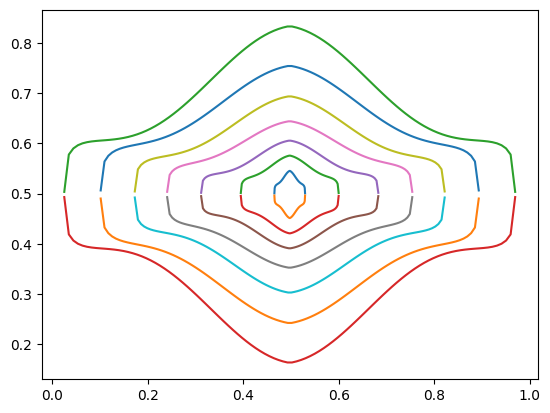

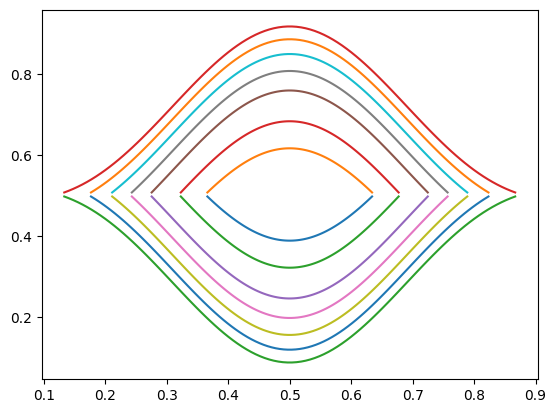

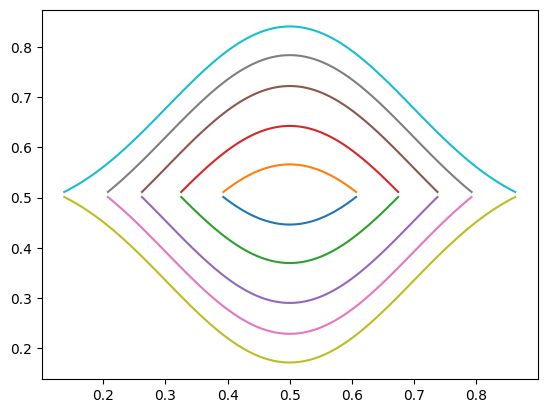

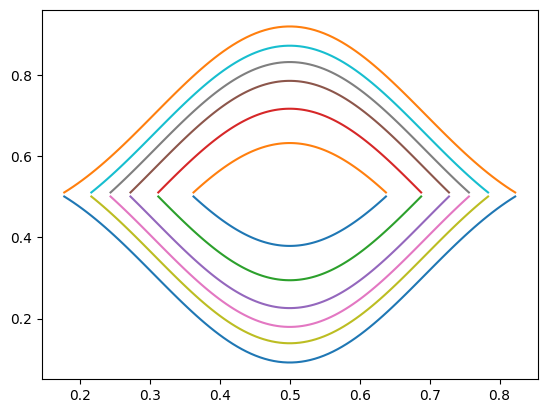

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

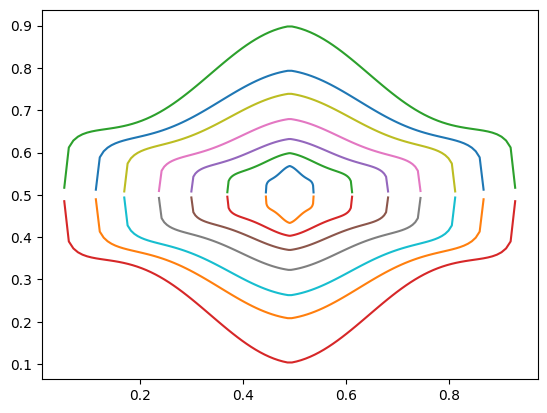

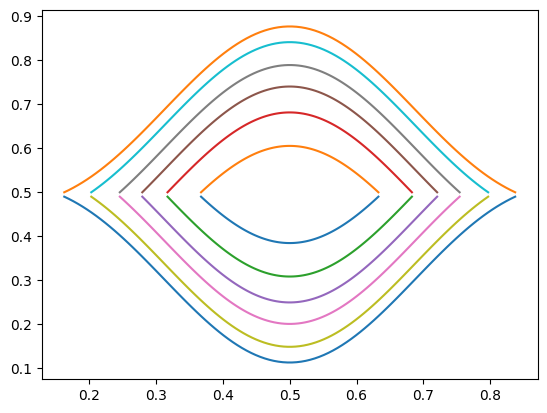

In [6]:
for i, shape_list in enumerate(shapes):
    plt.figure(i)
    for shape in shape_list:
        if "fusiform" in shape["type"]:
            p = shape["focal_length"]
            x_0 = shape["x_offset"]
            y_0 = shape["y_offset"]
            
            sin_params = shape["sin_params"]
            x_start, x_end = shape["x_start"], shape['x_end']
            if "fusiform_1" in shape['type']:
                y_sym = shape["y_symmetric_axis"]
                x = np.linspace(x_start, x_end, 100)
                epsilon, omega, phi = sin_params
                sin_wave = epsilon * np.sin(omega * x + phi)
                y1 = 4 * p * (x - x_0) ** 2 + y_0 + sin_wave
                y2 = 2 * y_sym - y1
                plt.plot(x, y1)
                plt.plot(x, y2)
            elif "fusiform_2" in shape['type']:
                power = shape["power"]
                x = np.linspace(x_start, x_end, 100)
                x_left = x[:50]
                epsilon, omega, phi = sin_params
                sin_wave = epsilon * np.sin(omega * (x - x_start) + phi)
                y_left = (np.abs(x_left - x_0) / (4 * p)) ** (1 / power) + y_0
                y_right = np.flip(y_left)
                y1 = np.concatenate([y_left, y_right]) + sin_wave
                y2 = 2 * y_0 - y1
                plt.plot(x, y1)
                plt.plot(x, y2)
    # plt.savefig(f'./draw_test/{i}.png')